## Номер варінту

In [1]:
N = (4 + 4) % 5 + 1
print(N)

4


## Дані з файлу 

In [4]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

## №1 
### Перші 8 рядків 

In [5]:
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


## №3 
### Імена стовпців набору даних

In [4]:
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


## №6 
### Кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [5]:
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()
unique_names_df = pd.DataFrame({
    'Gender': ['F', 'M'],
    'Name': [unique_female_names, unique_male_names]
})
unique_names_df.set_index('Gender', inplace=True)
print(unique_names_df)

         Name
Gender       
F       64911
M       39199


## №7 
### 5 найпопулярніших чоловічих імен у 2010 році

In [6]:
top_5_male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')].nlargest(5, 'Count')
print(top_5_male_names_2010)

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


## №8 
### Найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)


In [7]:
most_popular_name_row = df[df['Count'] == df['Count'].max()].iloc[0]
most_popular_name = most_popular_name_row['Name']
most_popular_year = most_popular_name_row['Year']
print(f"This name is '{most_popular_name}' in {most_popular_year}")

This name is 'Linda' in 1947


## №12 
### Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)


In [8]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
most_unique_names_year = unique_names_per_year.idxmax()
most_popular_name_most_unique_year = df[df['Year'] == most_unique_names_year].groupby('Name')['Count'].sum().idxmax()
print(f"'{most_popular_name_most_unique_year}'")

'Jacob'


## №13 
### Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих Імен



In [9]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_row_jacob_female = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]
print(most_popular_row_jacob_female)

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


## №14 
### Рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [10]:
names_F = df[df['Gender'] == 'F'][['Name', 'Year']]
names_M = df[df['Gender'] == 'M'][['Name', 'Year']]
gender_neutral_names = pd.merge(names_F, names_M, on=['Name', 'Year'])
gender_neutral_names_by_year = gender_neutral_names['Year'].value_counts()
year_with_most_gender_neutral_names = gender_neutral_names_by_year.idxmax()
num_gender_neutral_names = gender_neutral_names_by_year.max()
gender_neutral_names_df = pd.DataFrame({
    'Year': [year_with_most_gender_neutral_names],
    'Gender_neutral_names': [num_gender_neutral_names]
})
gender_neutral_names_df.set_index('Year', inplace=True)

print(gender_neutral_names_df)

      Gender_neutral_names
Year                      
2008                  2557


## №15
### Загальна кількість народжень за рік.

In [11]:
total_births_by_year = df.groupby('Year')['Count'].sum()
total_births_by_year_df = total_births_by_year.reset_index()
total_births_by_year_df.set_index('Year', inplace=True)
print(total_births_by_year_df)

        Count
Year         
1880   201484
1881   192699
1882   221538
1883   216950
1884   243467
...       ...
2010  3686589
2011  3646730
2012  3643336
2013  3626802
2014  3670151

[135 rows x 1 columns]


## №16
### Загальна кількість народжень за рік.

In [12]:
year_with_most_births = total_births_by_year_df['Count'].idxmax()
print(year_with_most_births)

1957


## №17
### Кількість дівчаток та хлопчиків, які народились кожного року

In [13]:
births_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(births_by_year_gender)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


## №19
### Графік загальної кількості народжень хлопчиків та дівчаток на рік.

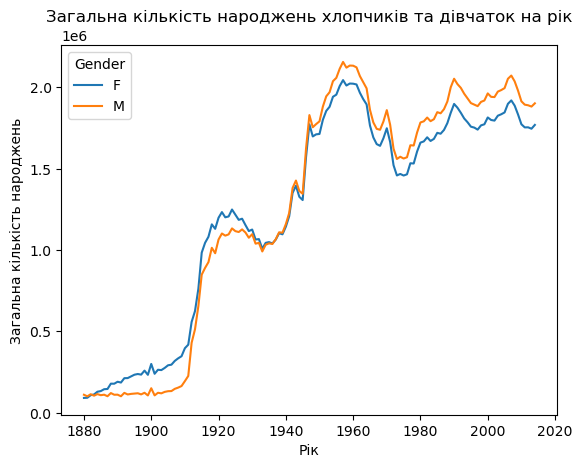

In [14]:
import matplotlib.pyplot as plt

births_by_year_gender.plot()
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Загальна кількість народжень')
plt.show()

## №20
### Кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [15]:
female_names = set(df[df['Gender'] == 'F']['Name'])
male_names = set(df[df['Gender'] == 'M']['Name'])
gender_neutral_names = female_names & male_names
num_gender_neutral_names = len(gender_neutral_names)
print(num_gender_neutral_names)

10221


## №22
### Скільки років проводилось спостереження

In [16]:
min_year = df['Year'].min()
max_year = df['Year'].max()
num_years = max_year - min_year + 1
print(f"'Спостереження проводилось {num_years} років'")

'Спостереження проводилось 135 років'


## №24
### Найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [17]:
average_count = df['Count'].mean()
unpopular_names = df[df['Count'] < average_count]
most_popular_unpopular_name = unpopular_names[unpopular_names['Count'] == unpopular_names['Count'].max()]
print(f"Найпопулярніше серед непопулярних імен - {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

Найпопулярніше серед непопулярних імен - Allen. Ним називали 184 разів


## №25
### Графіки розподілення кількості імен John та Mary по роках без залежності до статі.

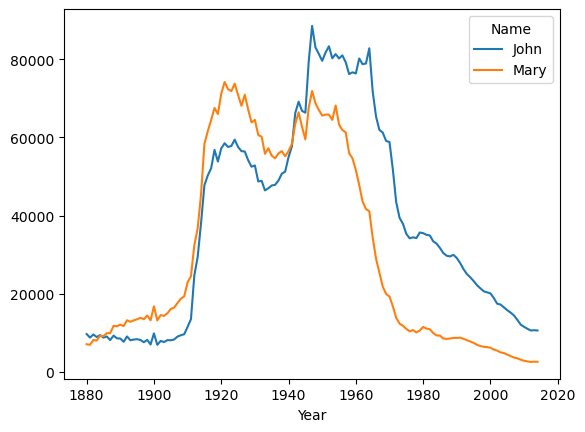

In [18]:
name_counts_by_year = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
name_counts_by_year.plot()
plt.show()

## №26
### Графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

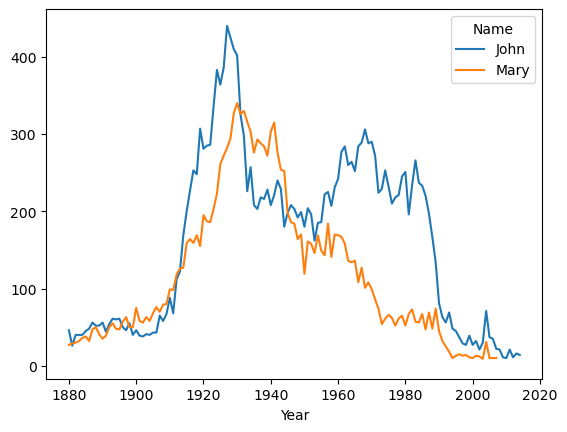

In [19]:
name_counts_by_year = df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | ((df['Name'] == 'Mary') & (df['Gender'] == 'M'))].groupby(['Year', 'Name'])['Count'].sum().unstack()
name_counts_by_year.plot()
plt.show()

## №27
### Найпопулярніші імена в кожному році.

In [20]:
name_counts_by_year = df.groupby(['Year', 'Name'])['Count'].sum()
most_popular_names_by_year = name_counts_by_year.reset_index().sort_values(['Year','Count'], ascending=[True, False]).drop_duplicates(subset='Year')
most_popular_names_by_year.set_index('Year', inplace=True)
print(most_popular_names_by_year)

          Name  Count
Year                 
1880      John   9701
1881      John   8795
1882      John   9597
1883      John   8934
1884      John   9428
...        ...    ...
2010  Isabella  22913
2011    Sophia  21839
2012    Sophia  22285
2013    Sophia  21172
2014      Emma  20811

[135 rows x 2 columns]
